Diseases classification in Apple leaves




Data Preprocessing

In [1]:
import numpy as np
import keras
from keras import models
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import SGD
from keras import layers
from keras.layers import  Dense, Flatten, Conv2D, MaxPooling2D
from keras import Input
                                                                                                            


Using TensorFlow backend.
/home/arya/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/arya/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/arya/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/arya/anaconda3/lib/python3.7/site-packages/tensorflow/py


* We are resizing the input image to 64 * 64

* In the dataset :
    Training Set : 70% 
    Validation Set : 20%
    Test Set : 10%

In [2]:
# Normalize training and validation data in the range of 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Read the training sample and set the batch size 
train_generator = train_datagen.flow_from_directory(
        'plant_village/train/',
        target_size=(64, 64),
        batch_size=16,
        class_mode='categorical')

# Read Validation data from directory and define target size with batch size
validation_generator = validation_datagen.flow_from_directory(
        'plant_village/val/',
        target_size=(64, 64),
        batch_size=16,
        class_mode='categorical',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        'plant_village/test/',
        target_size=(64, 64),
        batch_size=1,
        class_mode='categorical',
        shuffle=False)


Found 2217 images belonging to 4 classes.
Found 635 images belonging to 4 classes.
Found 319 images belonging to 4 classes.


Model Building


In [3]:
# model
model = models.Sequential()
# new layers
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

W1018 23:20:22.008196 140343504709440 deprecation_wrapper.py:119] From /home/arya/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:68: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1018 23:20:22.038230 140343504709440 deprecation_wrapper.py:119] From /home/arya/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:507: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1018 23:20:22.043016 140343504709440 deprecation_wrapper.py:119] From /home/arya/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3831: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1018 23:20:22.071054 140343504709440 deprecation_wrapper.py:119] From /home/arya/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3655: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 128)       3584      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

Compile the model with SGD and train it with 10 epochs

In [4]:
sgd = SGD(lr=0.001,decay=1e-6, momentum=0.9, nesterov=True)
# We are going to use accuracy metrics and cross entropy loss as performance parameters
model.compile(sgd, loss='categorical_crossentropy', metrics=['acc'])

history = model.fit_generator(train_generator, 
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

W1018 23:20:24.872758 140343504709440 deprecation_wrapper.py:119] From /home/arya/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:757: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1018 23:20:24.890450 140343504709440 deprecation_wrapper.py:119] From /home/arya/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3008: The name tf.log is deprecated. Please use tf.math.log instead.

W1018 23:20:25.026452 140343504709440 deprecation.py:323] From /home/arya/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1018 23:20:25.121460 140343504709440 deprecation_wrapper.py:119] From /home/arya/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:9

Epoch 1/10
139/138 [==============================] - 18s 133ms/step - loss: 1.2165 - acc: 0.5048 - val_loss: 1.1784 - val_acc: 0.5181
Epoch 2/10
139/138 [==============================] - 17s 125ms/step - loss: 1.1320 - acc: 0.5207 - val_loss: 1.0459 - val_acc: 0.5181
Epoch 3/10
139/138 [==============================] - 17s 125ms/step - loss: 0.8866 - acc: 0.6308 - val_loss: 0.7164 - val_acc: 0.7102
Epoch 4/10
139/138 [==============================] - 17s 126ms/step - loss: 0.6482 - acc: 0.7452 - val_loss: 0.5844 - val_acc: 0.7874
Epoch 5/10
139/138 [==============================] - 17s 124ms/step - loss: 0.5364 - acc: 0.7889 - val_loss: 0.4706 - val_acc: 0.8378
Epoch 6/10
139/138 [==============================] - 17s 124ms/step - loss: 0.4709 - acc: 0.8252 - val_loss: 0.4495 - val_acc: 0.8425
Epoch 7/10
139/138 [==============================] - 18s 126ms/step - loss: 0.4232 - acc: 0.8418 - val_loss: 0.4051 - val_acc: 0.8630
Epoch 8/10
139/138 [==============================] - 1

Saving the model


In [5]:
model.save('cnn_classification.h5')

Loading the Model

In [6]:
model = models.load_model('cnn_classification.h5')
print(model)

Saving weignts of model

In [7]:
model.save_weights('cnn_classification.h5')

Loading the Model weights

In [8]:
model.load_weights('cnn_classification.h5')

Performance Measures

**Now we are going to plot the accuracy and loss **

In [9]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
print(train_acc)
print(val_acc)
print(train_loss)
print(val_loss)

[0.5042850699949544, 0.5209742895939569, 0.6310329274868826, 0.7447000451328843, 0.788903924275692, 0.8249887235271108, 0.8416779431933264, 0.8606224628682065, 0.8709968426069484, 0.8818222823904396]
[0.5181102362204725, 0.5181102362204725, 0.710236220472441, 0.7874015752724776, 0.8377952760598791, 0.84251968503937, 0.862992125984252, 0.8299212603118475, 0.889763779527559, 0.8850393700787401]
[1.2170849362095035, 1.1316947168092981, 0.8857657123268, 0.648879577111273, 0.5363220360346834, 0.4715269890302573, 0.4230579709517402, 0.38167920290590357, 0.35267472481560913, 0.3379389964410406]
[1.1783760373986611, 1.045876403821735, 0.7164267034042539, 0.5843522451993988, 0.47063475732258925, 0.44951006424004636, 0.4050532313899731, 0.4989896475330112, 0.34329318103827827, 0.33628870037597]


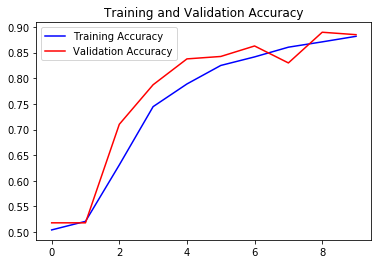

<Figure size 432x288 with 0 Axes>

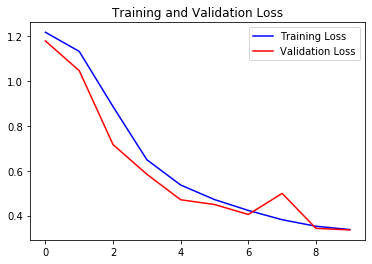

In [10]:
epochs = range(len(train_acc)) 
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


# Model Testing

In [11]:
# Get the filenames from the generator
fnames = test_generator.filenames
 
# Get the ground truth from generator
ground_truth = test_generator.classes
 
# Get the label to class mapping from the generator
label2index = test_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))


319/319 [==============================] - 2s 5ms/step
No of errors = 43/319


Addition of layers and using the pretrained model


In [12]:
new_model= models.Sequential()
model.load_weights('cnn_classification.h5', by_name=True)
new_model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu', input_shape=(64,64,3)))
new_model.add(MaxPooling2D(pool_size=(2,2)))
new_model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
new_model.add(MaxPooling2D(pool_size=(2,2)))
new_model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
new_model.add(MaxPooling2D(pool_size=(2,2)))
new_model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu'))
new_model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu'))
new_model.add(layers.Flatten())
new_model.add(layers.Dense(32, activation='relu'))
new_model.add(layers.Dense(4, activation='softmax'))
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 128)       3584      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 32)          18464     
__________

### Training the model after 5rd layer


In [13]:
for layer in new_model.layers[:6]:
    layer.trainable = False

for layer in new_model.layers:
    print(layer, layer.trainable)
new_model.summary()

<keras.layers.convolutional.Conv2D object at 0x7fa425cd48d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fa425cd4160> False
<keras.layers.convolutional.Conv2D object at 0x7fa425cbdc18> False
<keras.layers.pooling.MaxPooling2D object at 0x7fa425cae908> False
<keras.layers.convolutional.Conv2D object at 0x7fa425caecc0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fa425c891d0> False
<keras.layers.convolutional.Conv2D object at 0x7fa425c89898> True
<keras.layers.convolutional.Conv2D object at 0x7fa425a5ea20> True
<keras.layers.core.Flatten object at 0x7fa425a7bf28> True
<keras.layers.core.Dense object at 0x7fa425a7b278> True
<keras.layers.core.Dense object at 0x7fa425a8e748> True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 128)       3584      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (No

Hyperparameter Tuning

In [14]:
sgd = SGD(lr=0.001,decay=1e-6, momentum=0.9, nesterov=True)

new_model.compile(sgd, loss='categorical_crossentropy', metrics=['acc'])
 
new_history = new_model.fit_generator(train_generator, 
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=2,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/2
139/138 [==============================] - 9s 63ms/step - loss: 1.2994 - acc: 0.5066 - val_loss: 1.2252 - val_acc: 0.5181
Epoch 2/2
139/138 [==============================] - 8s 54ms/step - loss: 1.2017 - acc: 0.5196 - val_loss: 1.1944 - val_acc: 0.5181


Performance Measures



In [15]:
train_acc = new_history.history['acc']
val_acc = new_history.history['val_acc']
train_loss = new_history.history['loss']
val_loss = new_history.history['val_loss']

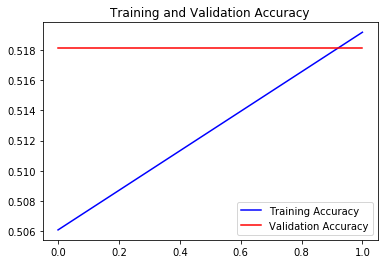

<Figure size 432x288 with 0 Axes>

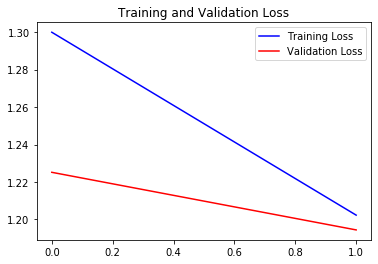

In [16]:
epochs = range(len(train_acc)) 
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


# Model Testing

In [17]:
# Get the filenames from the generator
fnames = test_generator.filenames
 
# Get the ground truth from generator
ground_truth = test_generator.classes
 
# Get the label to class mapping from the generator
label2index = test_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))


319/319 [==============================] - 2s 5ms/step
No of errors = 43/319


In [28]:
def new_image(file_path):
    new_datagen = ImageDataGenerator(rescale=1./255)
    new_generator = new_datagen.flow_from_directory(
        file_path,
        target_size=(64, 64),
        batch_size=1,
        class_mode='categorical',
        shuffle=False)
    fnames = new_generator.filenames
    ground_truth = new_generator.classes
    label2index = new_generator.class_indices
    idx2label = dict((v,k) for k,v in label2index.items())
    predictions1 = model.predict_generator(new_generator, steps=new_generator.samples/new_generator.batch_size,verbose=1)
    predicted_classes1 = np.argmax(predictions1,axis=1)
    print(predicted_classes1)
    
    
    